## Проверка новой платёжной воронки крупного интернет-магазина

Магазин недавно провёл А/B-тест, чтобы проверить новую платёжную воронку: гипотеза заключалась в том, что новая платёжная воронка увеличит конверсию в покупку. Вас просят проанализировать результаты А/B-теста, который назывался new_payment_funnel_test_summer_2025.

Описание данных:  
new_users_test_2025.csv — данные всех пользователей, зарегистрировавшихся в интернет-магазине с 1 по 14 июня 2025 года.  
sessions_test_2025.csv — данные всех сессий новых пользователей с 1 по 21 июня 2025 года.  
purchases_test_2025.csv — данные всех покупок новых пользователей с 1 по 21 июня 2025 года.  
participants_test_2025.csv — данные участников тестов. 

Структура данных выглядит следующим образом:  

Таблица new_users_test_2025.csv состоит из полей:  
- `user_id` — уникальный идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион, к которому относится пользователь;
- `device` — устройство, с которого происходила регистрация.

Таблица sessions_test_2025.csv состоит из полей:  
- `user_id` — уникальный идентификатор пользователя;
- `session_start` — дата начала сессии;
- `session_duration` — длительность сессии в минутах.
  
Таблица purchases_test_2025.csv состоит из полей:  
- `user_id` — уникальный идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `revenue` — стоимость покупки в долларах.

Таблица participants_test_2025.csv состоит из полей:  
- `user_id` — уникальный идентификатор пользователя;
- `group` — группа А/B-теста;
- `ab_test` — название А/B-теста.

## Что нужно сделать

### Шаг 1. Загрузка и подготовка данных
1. Загрузите данные о новых зарегистрированных пользователях, о покупках и сессиях, а также об участниках теста.
2. Выполните предобработку данных.
### Шаг 2. Исследовательский анализ данных теста
1. Постройте графики кумулятивной динамики метрик и проанализируйте их.
2. Ответьте на вопросы: Какой была конверсия в разных группах? Как выглядит кумулятивная динамика покупок?
### Шаг 3. Проверка гипотез
1. Примените подходящий статистический тест для проверки гипотезы.
### Шаг 4. Формулирование выводов и рекомендаций
1. Сформулируйте выводы по результатам тестирования: Был ли тест проведён согласно техническому заданию? Было ли распределение на тестовые группы корректным? Наблюдается ли различие в целевых метриках между тестовыми группами?

Оставьте рекомендации для заказчика по результатам своего анализа.

### Шаг 1. Загрузка и подготовка данных

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

In [10]:
try:
    new_users_test = pd.reav_csv('new_users_test_2025.csv')
except:
    new_users_test = pd.read_csv('https://code.s3.yandex.net/datasets/new_users_test_2025.csv')
try:
    sessions_test = pd.reav_csv('sessions_test_2025.csv')
except:
    sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_test_2025.csv')
try:
    purchases_test = pd.reav_csv('purchases_test_2025.csv')
except:
    purchases_test = pd.read_csv('https://code.s3.yandex.net/datasets/purchases_test_2025.csv')
try:
    participans_test = pd.reav_csv('participants_test_2025.csv')
except:
    participants_test = pd.read_csv('https://code.s3.yandex.net/datasets/participants_test_2025.csv')

In [12]:
new_users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131486 entries, 0 to 131485
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     131486 non-null  object
 1   first_date  131486 non-null  object
 2   region      131486 non-null  object
 3   device      131486 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


In [14]:
sessions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491443 entries, 0 to 491442
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           491443 non-null  object 
 1   session_start     491443 non-null  object 
 2   session_duration  491443 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.2+ MB


In [16]:
purchases_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149152 entries, 0 to 149151
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   149152 non-null  object 
 1   event_dt  149152 non-null  object 
 2   revenue   149152 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.4+ MB


In [18]:
participants_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  3291 non-null   object
 1   group    3291 non-null   object
 2   ab_test  3291 non-null   object
dtypes: object(3)
memory usage: 77.3+ KB


В ходе первичного расммотрения данных можно заметить, что пропусков не обнаружено. Единственная проблема дата представлена не в том формате, это следует изменить. Изучим также сами данные.

In [21]:
new_users_test.head(5)

,user_id,first_date,region,device
0,D72A72121175D8BE,2025-06-01,South Asia,iPhone
1,F1C668619DFE6E65,2025-06-01,Southeast Asia,iPhone
2,2E1BF1D4C37EA01F,2025-06-01,Central Asia,Mac
3,50734A22C0C63768,2025-06-01,Central Asia,Android
4,E1BDDCE0DAFA2679,2025-06-01,Southeast Asia,iPhone


In [23]:
sessions_test.head(5)

,user_id,session_start,session_duration
0,D72A72121175D8BE,2025-06-01 05:51:20,1.0
1,F1C668619DFE6E65,2025-06-01 15:28:14,5.0
2,2E1BF1D4C37EA01F,2025-06-01 16:19:36,3.0
3,50734A22C0C63768,2025-06-01 21:06:51,1.0
4,E1BDDCE0DAFA2679,2025-06-01 10:03:00,2.0


In [27]:
purchases_test.head(5)

,user_id,event_dt,revenue
0,50734A22C0C63768,2025-06-01 21:06:51,4.99
1,0FC21E6F8FAA8DEC,2025-06-01 06:36:08,4.99
2,9CD9F34546DF254C,2025-06-01 14:40:29,99.99
3,1FD7660FDF94CA1F,2025-06-01 04:53:00,4.99
4,E6AF85675078215D,2025-06-01 11:40:09,4.99


In [29]:
participants_test.head(5)

,user_id,group,ab_test
0,6A8825D752FCFFB6,A,new_payment_funnel_test_summer_2025
1,0B75608CBBA59791,B,new_payment_funnel_test_summer_2025
2,6B9D2F7685B83C73,A,new_payment_funnel_test_summer_2025
3,6435D4C2E66A7F75,B,new_payment_funnel_test_summer_2025
4,4F815438BBD2BB7E,A,new_payment_funnel_test_summer_2025


Учитывая, что в названии присуствует название теста, стоит проверить не было ли другого теста.

Для начала перобразуем данные даты в необходимый формат.

In [39]:
new_users_test['first_date'] = pd.to_datetime(new_users_test['first_date'])
sessions_test['session_start'] = pd.to_datetime(sessions_test['session_start'])
purchases_test['event_dt'] = pd.to_datetime(purchases_test['event_dt'])

In [41]:
#приворим количество уникаольных значений теста
participants_test['ab_test'].value_counts()

ab_test
new_payment_funnel_test_summer_2025    3066
new_login_screen_apac                   225
Name: count, dtype: int64

Всего в данных представлено два теста, чтобы избежать проблем стоит оставить только те записи, которые связаны с участниками теста.

In [59]:
test = 'new_payment_funnel_test_summer_2025'
test_participants = participants_test[participants_test['ab_test']==test]
new_users = new_users_test.merge(test_participants, on = 'user_id', how = 'inner')
session_test = sessions_test.merge(test_participants, on = 'user_id', how = 'inner')
purchase_test = purchases_test.merge(test_participants, on = 'user_id', how = 'inner')

Проверим как распределились пользователи по группам и по регионам

In [64]:
report = new_users.groupby('region').agg({'user_id':'nunique'}).rename(columns = {'user_id':'участники'})
report['% участников'] = report['участники'] / report['участники'].sum().round(2)*100
report.sort_values(by='участники', ascending = False)

,участники,% участников
region,,
Southeast Asia,2951,96.249185
Central Asia,47,1.532942
East Asia,42,1.369863
South Asia,26,0.848010


В основном все пользователи из юго-восточной Азии, в остальных регионах пользователей во много раз меньше. Соответсвенно будущие гипотезы вероятнее всего подтвердить только для одной группы пользователей.

In [68]:
test_participants.groupby('group')['user_id'].nunique()

group
A    1598
B    1468
Name: user_id, dtype: int64

In [70]:
100 * test_participants[test_participants['group'] == 'A']['user_id'].nunique()/test_participants['user_id'].nunique(), 100 * test_participants[test_participants['group'] == 'B']['user_id'].nunique()/test_participants['user_id'].nunique()

(52.120026092628834, 47.879973907371166)

<Axes: ylabel='Количество пользователей'>

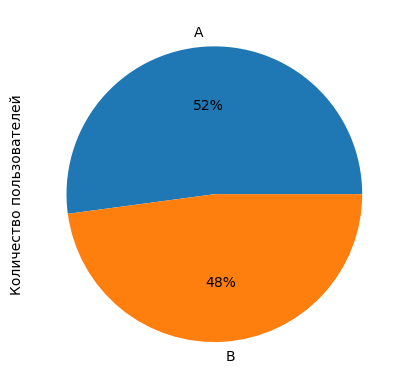

In [72]:
test_participants.groupby('group')['user_id'].nunique().plot(kind = 'pie', ylabel = 'Количество пользователей', autopct='%1.0f%%')

Группы распределены слегка неравномерно, однако такой разницей можно принебречь. Учитывая количество уникальных значений и количество уникальных значений в группах, можно говорить о том, что пересечений в группах нет.

### Шаг 2. Исследовательский анализ данных теста

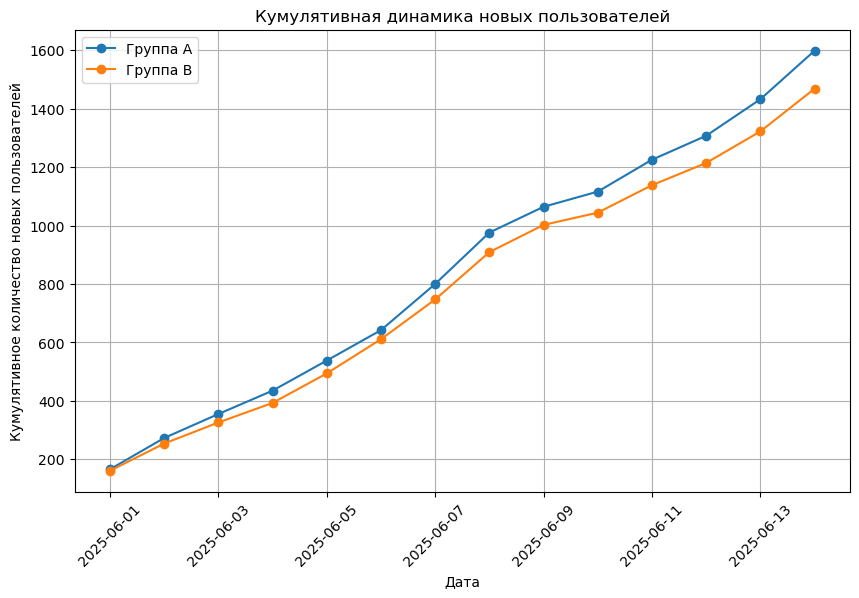

In [84]:
cumul_users = new_users.groupby(['first_date', 'group']).agg({'user_id':'nunique'}).reset_index()
cumul_users = cumul_users.sort_values('first_date')

cumul_users['cumul_users'] = 0
for grp in cumul_users['group'].unique():
    temp_sum = 0
    grp_idx = cumul_users['group'] == grp
    cum_list = []
    for users in cumul_users.loc[grp_idx, 'user_id']:
        temp_sum += users
        cum_list.append(temp_sum)
    cumul_users.loc[grp_idx, 'cum_users'] = cum_list

plt.figure(figsize=(10, 6))
for grp in cumul_users['group'].unique():
    grp_data = cumul_users[cumul_users['group'] == grp]
    plt.plot(grp_data['first_date'], grp_data['cum_users'], marker='o', label=f'Группа {grp}')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное количество новых пользователей')
plt.title('Кумулятивная динамика новых пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

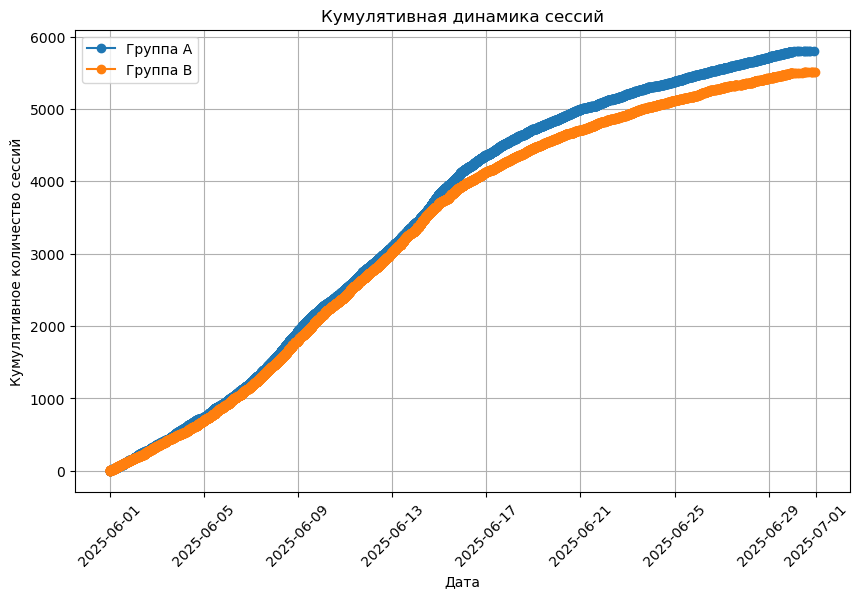

In [86]:
# График кумулятивной динамики сессий
# Группируем данные по дате начала сессии и тестовой группе, считаем количество сессий
cml_sessions = session_test.groupby(['session_start', 'group']).size().reset_index(name='session_count')
cml_sessions = cml_sessions.sort_values('session_start')

# Вычисляем кумулятивное количество сессий для каждой группы
cml_sessions['cml_sessions'] = cml_sessions.groupby('group')['session_count'].cumsum()

# Строим график
plt.figure(figsize=(10, 6))
for grp in cml_sessions['group'].unique():
    grp_data = cml_sessions[cml_sessions['group'] == grp]
    plt.plot(grp_data['session_start'], grp_data['cml_sessions'], marker='o', label=f'Группа {grp}')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное количество сессий')
plt.title('Кумулятивная динамика сессий')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Предварительный вывод по графикам: во всех рассматриваемых метриках (новые пользователи и сессии) результаты группы A немного лучше результатов группы B. Визуально разница не кажется огромной, но она устойчиво сохраняется на протяжении теста.

In [91]:
purchase_user = purchase_test.groupby('group')['user_id'].nunique()
total_user = new_users.groupby('group')['user_id'].nunique()
conversion = (purchase_user / total_user).reset_index()
display(conversion)

,group,user_id
0,A,0.295369
1,B,0.183924


По результатам изучения конверсии в покупки заметно, что в группе B. конверсия ниже - 18,4% по сравнению с группой А - 29,5%. Разница составляет 11,1%. Стоит проверить статистическую значомсоть полученной разницы.

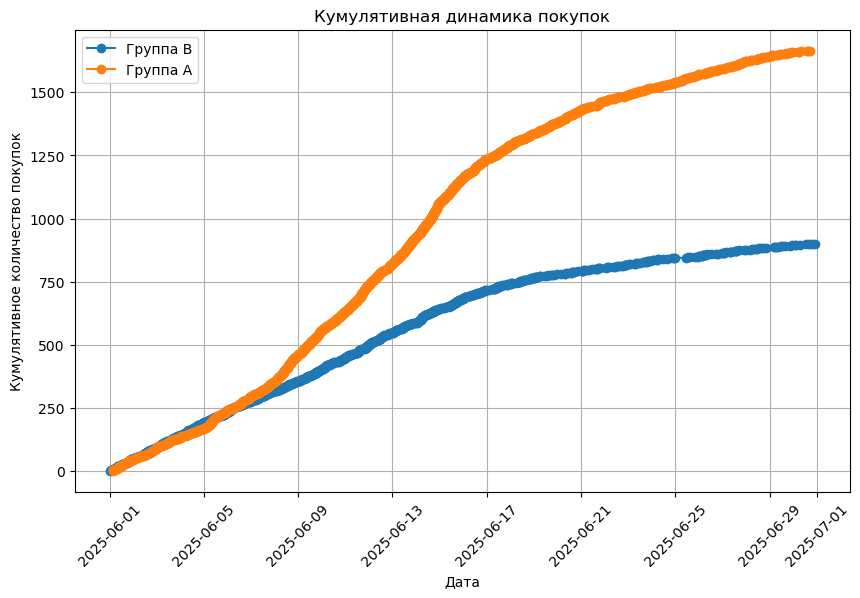

In [94]:
# Группируем данные по дате покупки и тестовой группе, считаем количество покупок
cml_purchases = purchase_test.groupby(['event_dt', 'group']).size().reset_index(name='purchase_count')
cml_purchases = cml_purchases.sort_values('event_dt')

# Вычисляем кумулятивное количество покупок для каждой группы вручную без использования cumsum()
# Создаём столбец для накопительных значений
cml_purchases['cml_purchases'] = 0
for grp in cml_purchases['group'].unique():
    temp_sum = 0
    grp_idx = cml_purchases['group'] == grp
    cum_list = []
    for count in cml_purchases.loc[grp_idx, 'purchase_count']:
        temp_sum += count
        cum_list.append(temp_sum)
    cml_purchases.loc[grp_idx, 'cml_purchases'] = cum_list

# Строим график кумулятивной динамики покупок по группам
plt.figure(figsize=(10, 6))
for grp in cml_purchases['group'].unique():
    grp_data = cml_purchases[cml_purchases['group'] == grp]
    plt.plot(grp_data['event_dt'], grp_data['cml_purchases'], marker='o', label=f'Группа {grp}')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное количество покупок')
plt.title('Кумулятивная динамика покупок')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Виден рост у группы А. Для окончательных выводов о статистической значимости этой разницы необходимо проверить метрики с помощью соответствующих статистических тестов (например, z-теста или теста Манна — Уитни), а также убедиться, что тест соответствует всем требованиям технического задания (сроки проведения, достаточный размер выборки и так далее).

In [107]:
groups = list(test_participants['group'].unique())

if 'A' in groups and 'B' in groups:
    count = [purchase_user['A'], purchase_user['B']]
    nobs = [total_user['A'], total_user['B']]
    stats, pvalue = proportions_ztest(count, nobs)
    print(f"\nРезультаты Z-теста для конверсии:\n"
          f"Статистика = {stats:.2f}, p-value = {pvalue:.3f}")
else:
    print("\nДля проведения Z-теста требуются как минимум группы A и B.")


Результаты Z-теста для конверсии:
Статистика = 7.20, p-value = 0.000


Критерий показывает, что между группами действительно существуют статистически значимые различия.

Сформулировать выводы по результатам тестирования:

Был ли тест проведён согласно техническому заданию?
Было ли распределение на тестовые группы корректным?
Наблюдается ли различие в метрике конверсии между тестовыми группами?
Выводы:

Тест был проведён в соответствии с ТЗ с небольшими, практически незначительными отклонениями.

Между группами наблюдаются статистически значимые различия: у группы А более высокий уровень конверсии в покупку, чем у группы В.

Рекомендации для заказчика:

Новая платёжная воронка работает хуже, чем старая. Не рекомендовано её внедрять для всех пользователей.
Конверсия снизилась — можно предположить, что в момент первой покупки у части пользователей возникают технические сложности, и этот момент нужно протестировать.